In [1]:
from utils.load_results import *
from utils.plot_helpers import *
from utils.analysis_from_interaction import error_analysis

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('default')
import random
from seaborn.algorithms import bootstrap

# ZeroShot Quantitative analyses
Trying to reproduce the results from the paper "Agents can generalize to novel levels of abstraction with the help of language" using the 3dshapes dataset.

Effectively the results from dataset "(3,4)_game_size_10_vsf_3" and "3dshapes/shapes3d_feat_rep_game_size_10_vsf_3" are compared with each other.


## Loading 

In [2]:
game_size = 10
n_values = [4,]
n_attributes = [3,]
n_epochs = 300
datasets = ['(3,4)',]
n_datasets = len(datasets)
n_runs = 3
path_3ds_zs = ['results/3dshapes/' + 'shapes3d_feat_rep_game_size_' + str(game_size) + '_vsf_3']
path_zs = ['results/(3,4)_game_size_' + str(game_size) + '_vsf_3']


In [3]:
zero_shot_test_ds='test_sampled_unscaled'
context_unaware = False # whether original or context_unaware simulations are evaluated
if context_unaware:
    setting = 'context_unaware'
else:
    setting = 'standard' # context-aware

In [4]:
# 3dshapes 
all_accuracies_3ds = load_accuracies(path_3ds_zs, n_runs=n_runs, n_epochs=300, val_steps=1, zero_shot=True, context_unaware=context_unaware)

# to specific
zs_specific_train_acc_3ds = all_accuracies_3ds['zs_specific_train_acc']
zs_specific_val_acc_3ds = all_accuracies_3ds['zs_specific_val_acc']
zs_specific_test_acc_3ds = all_accuracies_3ds['zs_specific_test_acc']
zs_specific_train_message_length_3ds = all_accuracies_3ds['zs_specific_train_message_length']

# to generic
zs_generic_train_acc_3ds = all_accuracies_3ds['zs_generic_train_acc']
zs_generic_val_acc_3ds = all_accuracies_3ds['zs_generic_val_acc']
zs_generic_test_acc_3ds = all_accuracies_3ds['zs_generic_test_acc']
zs_generic_train_message_length_3ds = all_accuracies_3ds['zs_generic_train_message_length']

In [5]:
# Not 3dshapes
all_accuracies = load_accuracies(path_zs, n_runs=n_runs, n_epochs=300, val_steps=1, zero_shot=True, context_unaware=context_unaware)

# to specific
zs_specific_train_acc = all_accuracies['zs_specific_train_acc']
zs_specific_val_acc = all_accuracies['zs_specific_val_acc']
zs_specific_test_acc = all_accuracies['zs_specific_test_acc']
zs_specific_train_message_length = all_accuracies['zs_specific_train_message_length']

# to generic
zs_generic_train_acc = all_accuracies['zs_generic_train_acc']
zs_generic_val_acc = all_accuracies['zs_generic_val_acc']
zs_generic_test_acc = all_accuracies['zs_generic_test_acc']
zs_generic_train_message_length = all_accuracies['zs_generic_train_message_length']

# Comparing Training and Validation
## "to specific"

In [6]:
# Final Training Accuracies
zs_specific_final_accuracies_train_3ds = {}
zs_specific_final_accuracies_train_st = {}

for i, d in enumerate(datasets):
    gather_accuracies_3ds = []
    gather_accuracies_st = []

    for run in range(n_runs):
        gather_accuracies_3ds.append(all_accuracies_3ds['zs_specific_train_acc'][i][run][-1])
        gather_accuracies_st.append(all_accuracies['zs_specific_train_acc'][i][run][-1])
    zs_specific_final_accuracies_train_3ds = (round(np.mean(gather_accuracies_3ds), 3), round(np.std(gather_accuracies_3ds), 3))
    zs_specific_final_accuracies_train_st = (round(np.mean(gather_accuracies_st), 3), round(np.std(gather_accuracies_st), 3))

# Final Validation accuracies
zs_specific_final_accuracies_val_3ds = {}
zs_specific_final_accuracies_val_st = {}

for i, d in enumerate(datasets):
    gather_accuracies_3ds = []
    gather_accuracies_st = []

    for run in range(n_runs):
        gather_accuracies_3ds.append(all_accuracies_3ds['zs_specific_val_acc'][i][run][-1])
        gather_accuracies_st.append(all_accuracies['zs_specific_val_acc'][i][run][-1])
    zs_specific_final_accuracies_val_3ds = (round(np.mean(gather_accuracies_3ds), 3), round(np.std(gather_accuracies_3ds), 3))
    zs_specific_final_accuracies_val_st = (round(np.mean(gather_accuracies_st), 3), round(np.std(gather_accuracies_st), 3))

# Create DataFrame for comparison
data = {'training': [zs_specific_final_accuracies_train_3ds, zs_specific_final_accuracies_train_st], 
        'validation': [zs_specific_final_accuracies_val_3ds, zs_specific_final_accuracies_val_st]}
comparison_to_specific = pd.DataFrame(data=data, index=["shapes3d", "standard"])

latex_table_1 = comparison_to_specific.to_latex(index=True, escape=False)

print("Final Training Accuracies (to specific):")
print(comparison_to_specific)
# Paper: 0.99, 0.98

Final Training Accuracies (to specific):
                training      validation
shapes3d  (0.911, 0.005)  (0.849, 0.012)
standard  (0.994, 0.004)  (0.978, 0.008)


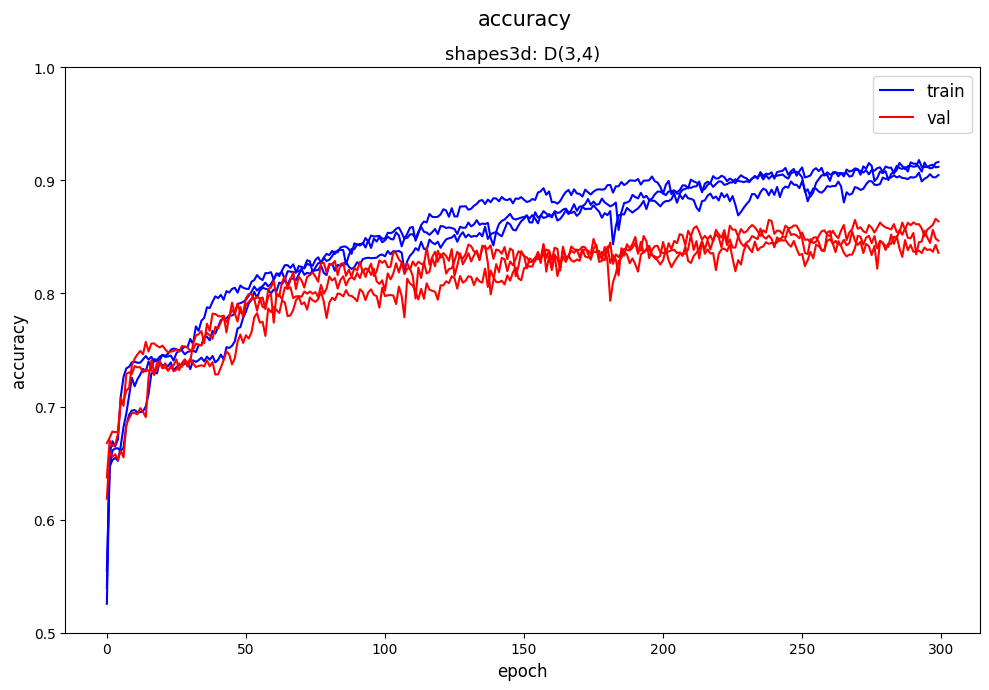

In [7]:
plot_training_trajectory(shapes3d=True, results_train=all_accuracies_3ds['zs_specific_train_acc'], results_val=all_accuracies_3ds['zs_specific_val_acc'], ylim=(0.5, 1), steps=(1, 1), plot_indices=(1, ), plot_shape=(1, 1))

## "to generic"

In [8]:
# Final Training Accuracies
zs_generic_final_accuracies_train_3ds = {}
zs_generic_final_accuracies_train_st = {}

for i, d in enumerate(datasets):
    gather_accuracies_3ds = []
    gather_accuracies_st = []

    for run in range(n_runs):
        gather_accuracies_3ds.append(all_accuracies_3ds['zs_generic_train_acc'][i][run][-1])
        gather_accuracies_st.append(all_accuracies['zs_generic_train_acc'][i][run][-1])
    zs_generic_final_accuracies_train_3ds = (round(np.mean(gather_accuracies_3ds), 3), round(np.std(gather_accuracies_3ds), 3))
    zs_generic_final_accuracies_train_st = (round(np.mean(gather_accuracies_st), 3), round(np.std(gather_accuracies_st), 3))

# Final Validation accuracies
zs_generic_final_accuracies_val_3ds = {}
zs_generic_final_accuracies_val_st = {}

for i, d in enumerate(datasets):
    gather_accuracies_3ds = []
    gather_accuracies_st = []

    for run in range(n_runs):
        gather_accuracies_3ds.append(all_accuracies_3ds['zs_generic_val_acc'][i][run][-1])
        gather_accuracies_st.append(all_accuracies['zs_generic_val_acc'][i][run][-1])
    zs_generic_final_accuracies_val_3ds = (round(np.mean(gather_accuracies_3ds), 3), round(np.std(gather_accuracies_3ds), 3))
    zs_generic_final_accuracies_val_st = (round(np.mean(gather_accuracies_st), 3), round(np.std(gather_accuracies_st), 3))

# Create DataFrame for comparison
data = {'training': [zs_generic_final_accuracies_train_3ds, zs_generic_final_accuracies_train_st], 
        'validation': [zs_generic_final_accuracies_val_3ds, zs_generic_final_accuracies_val_st]}

comparison_to_generic = pd.DataFrame(data=data, index=["shapes3d", "standard"])
latex_table_2 = comparison_to_generic.to_latex(index=True, escape=False)

print("Final Training Accuracies (to generic):")
print(comparison_to_generic)
# Paper: 0.99, 0.98

Final Training Accuracies (to generic):
                training      validation
shapes3d  (0.923, 0.005)  (0.897, 0.005)
standard  (0.989, 0.005)   (0.977, 0.01)


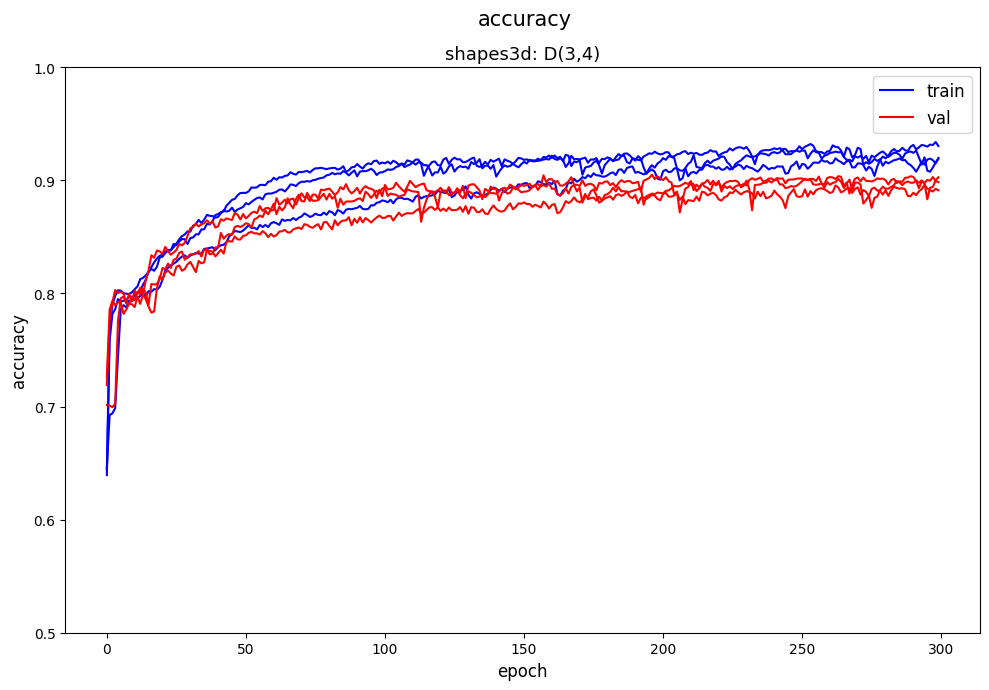

In [9]:
plot_training_trajectory(shapes3d=True, results_train=all_accuracies_3ds['zs_generic_train_acc'], results_val=all_accuracies_3ds['zs_generic_val_acc'], ylim=(0.5, 1), steps=(1, 1), plot_indices=(1, ), plot_shape=(1, 1))

# Comparing Test Accuracies 

In [10]:
# 3dshapes
zs_specific_test_acc_mean_3ds = np.mean(zs_specific_test_acc_3ds)
zs_generic_test_acc_mean_3ds = np.mean(zs_generic_test_acc_3ds)

# standard
zs_specific_test_acc_mean = np.mean(zs_specific_test_acc)
zs_generic_test_acc_mean = np.mean(zs_generic_test_acc)

In [11]:
data = {'to specific': [zs_specific_test_acc_mean_3ds, zs_specific_test_acc_mean], 
        'to generic': [zs_generic_test_acc_mean_3ds, zs_generic_test_acc_mean]}

comparison_test_acc = pd.DataFrame(data=data, index=["shapes3d", "standard"])
latex_table_3 = comparison_test_acc.to_latex(index=True, escape=False)

print("Comparing Test accuracies (both conditions):")
print(comparison_test_acc)
# Previous results:
# shapes3d     0.823766    0.844885

Comparing Test accuracies (both conditions):
          to specific  to generic
shapes3d     0.879583    0.756111
standard     0.902214    0.697778


### Interpretation of the training accuracies of both conditions as well as Test accuracy comparison:

- 'Specific'
  - 3dshapes model performs very well on the training data in the 'specific' condition and still reasonably well on the validation dataset, which indicates mild overfitting.
  - Since test accuracy is slightly higher than the validation accuracy (0.880), which means the model generalizes well and the slight overfitting is more or less negligible. 

- 'Generic'
  - 3dshapes model performs very well on the training data (0.923) and comparably well on the validation dataset (0.897), which does not indicate overfitting.
  - However, the test accuracy for shapes3d shows a significant performance drop (0.756), which means the model generalizes less well than expected and could have an overfitting problem. This drop is even more pronounced for the symbolic dataset (0.698).
    - Perhaps this could indicate a too significant distribution shift or another test set issue?

- The accuracies for the 3dshapes model are generally slightly lower, but this is expected since the input dataset has high-dimensional fature representations extracted from the images, while the symbolic dataset has perfect and noise free attribute tuples. In the 3dshapes dataset the features are also first learned by a vision model which might not perfectly disentangle the underlying factors. This comes from the challenges of learning from more natural input.
  - This is in general also to be expected for the rest of the scores 


# Comparing NMI, Effectiveness and Consistency

In [12]:
# 3dshapes
zs_entropy_scores_specific_3ds, zs_entropy_scores_generic_3ds = load_entropies_zero_shot(path_3ds_zs, n_runs=n_runs, context_unaware=context_unaware, zero_shot_test_ds=zero_shot_test_ds, verbose=True)  
entropies_specific_3ds = [zs_entropy_scores_specific_3ds['NMI'], zs_entropy_scores_specific_3ds['effectiveness'], zs_entropy_scores_specific_3ds['consistency']]
entropies_generic_3ds = [zs_entropy_scores_generic_3ds['NMI'], zs_entropy_scores_generic_3ds['effectiveness'], zs_entropy_scores_generic_3ds['consistency']]

# standard
zs_entropy_scores_specific_st, zs_entropy_scores_generic_st = load_entropies_zero_shot(path_zs, n_runs=n_runs, context_unaware=context_unaware, zero_shot_test_ds=zero_shot_test_ds)  
entropies_specific_st = [zs_entropy_scores_specific_st['NMI'], zs_entropy_scores_specific_st['effectiveness'], zs_entropy_scores_specific_st['consistency']]
entropies_generic_st = [zs_entropy_scores_generic_st['NMI'], zs_entropy_scores_generic_st['effectiveness'], zs_entropy_scores_generic_st['consistency']]

Entropy scores loaded from: results/3dshapes/shapes3d_feat_rep_game_size_10_vsf_3/standard/zero_shot/specific/0/entropy_scores.pkl
Entropy scores loaded from: results/3dshapes/shapes3d_feat_rep_game_size_10_vsf_3/standard/zero_shot/specific/1/entropy_scores.pkl
Entropy scores loaded from: results/3dshapes/shapes3d_feat_rep_game_size_10_vsf_3/standard/zero_shot/specific/2/entropy_scores.pkl
Entropy scores loaded from: results/3dshapes/shapes3d_feat_rep_game_size_10_vsf_3/standard/zero_shot/generic/0/entropy_scores.pkl
Entropy scores loaded from: results/3dshapes/shapes3d_feat_rep_game_size_10_vsf_3/standard/zero_shot/generic/1/entropy_scores.pkl


Entropy scores loaded from: results/3dshapes/shapes3d_feat_rep_game_size_10_vsf_3/standard/zero_shot/generic/2/entropy_scores.pkl


In [13]:
data = {'to specific': [np.mean(entropies_specific_3ds[0]), np.mean(entropies_specific_st[0])], 
        'to generic': [np.mean(entropies_generic_3ds[0]), np.mean(entropies_generic_st[0])]}

comparison_entropy = pd.DataFrame(data=data, index=["shapes3d", "standard"])
latex_table_2 = comparison_entropy.to_latex(index=True, escape=False)

data = {'to specific': [entropies_specific_3ds[0]], 
        'to generic': [entropies_generic_3ds[0]]}

print("All to specific NMI scores (3dshapes): ", data)

print("Comparing NMI (both conditions):")
print(comparison_entropy)
# Paper: 0.93, 0.87

All to specific NMI scores (3dshapes):  {'to specific': [array([[0.60746479, 0.60589881, 0.60629485]])], 'to generic': [array([[0.7075107 , 0.70919581, 0.6877529 ]])]}
Comparing NMI (both conditions):
          to specific  to generic
shapes3d     0.606553    0.701486
standard     0.917209    0.885989


In [14]:
data = {'to specific': [np.mean(entropies_specific_3ds[1]), np.mean(entropies_specific_st[1])], 
        'to generic': [np.mean(entropies_generic_3ds[1]), np.mean(entropies_generic_st[1])]}

comparison_entropy = pd.DataFrame(data=data, index=["shapes3d", "standard"])
latex_table_2 = comparison_entropy.to_latex(index=True, escape=False)

data = {'to specific': [entropies_specific_3ds[1]], 
        'to generic': [entropies_generic_3ds[1]]}

print("All to specific effeciveness scores (3dshapes): ", data)

print("Comparing effectiveness (both conditions):")
print(comparison_entropy)

All to specific effeciveness scores (3dshapes):  {'to specific': [array([[0.55603697, 0.54265907, 0.56721634]])], 'to generic': [array([[0.61655323, 0.6156279 , 0.57946958]])]}
Comparing effectiveness (both conditions):
          to specific  to generic
shapes3d     0.555304    0.603884
standard     0.951090    0.914211


In [15]:
data = {'to specific': [np.mean(entropies_specific_3ds[2]), np.mean(entropies_specific_st[2])], 
        'to generic': [np.mean(entropies_generic_3ds[2]), np.mean(entropies_generic_st[2])]}

comparison_entropy = pd.DataFrame(data=data, index=["shapes3d", "standard"])
latex_table_2 = comparison_entropy.to_latex(index=True, escape=False)

data = {'to specific': [entropies_specific_3ds[2]], 
        'to generic': [entropies_generic_3ds[2]]}

print("All to specific consistency scores (3dshapes): ", data)

print("Comparing consistency (both conditions):")
print(comparison_entropy)

All to specific consistency scores (3dshapes):  {'to specific': [array([[0.66937526, 0.68582232, 0.65115643]])], 'to generic': [array([[0.82994963, 0.83630377, 0.84580541]])]}
Comparing consistency (both conditions):
          to specific  to generic
shapes3d     0.668785    0.837353
standard     0.885682    0.859852


### Interpretation of the NMI, Effectiveness and Consistency Comparison

- NMI (how well learned messages correspond to underlying concepts)
    - Less precise and more ambiguous mapping in the shapes3d condition for both 'specific' and 'generic' (0.61, 0.70), while for the symbolic dataset the scores are quite good (0.92, 0.89)
    - It was expected that the 'generic' condition for the shapes3d dataset would be slightly worse than the 'specific' condition (as is the case for the symbolic dataset), however this trend could not be replicated. 

- Effectiveness (how well the communication protocoll allows the receiver to identify the correct target)
    - Again, while the scores for the symbolic dataset were very high (both over 0.9), the scores for the shapes3d dataset were noticeably lower (0.56, 0.60).
    - The trend that the 'generic' concept would have lower scores than the 'specific' concept (as seen for the symbolic dataset) could not be replicated with the shapes3d dataset

- Consistency (how reliably same message is used for the same concept)
    - The scores for the symbolic dataset indicate that the model is almost equally consistent for both the generic and specific conditions (0.89, 0.86).
    - The scores for the shapes3d dataset show that for the 'generic' condition the agents were as consistent (0.84) as for the symbolic dataset, however, the 'specific' conditions were again noticeably lower (0.67)

- Why the strong difference?
    - Perhaps the 3dshapes agents rely more on holistic or pattern-based representations, and not modular combinations like the symbolic dataset agents
    - It is expected that the scores for the generic condition are lower than the specific ones, since in the generic zero shot condition requires abstracting over more variability (which is harder), while in the specific zero shot condition only requires that the agent swap a known attribute within a familiar context (which is easier). The 3dshapes results do not replicate this expectation.
    - symbolic uses just one model, while for shapes3d the results are obtained by 2models
    - maybe the feature representations of the vision module make it more difficult to properly work in the to specific condition
    - effectiveness score for effectiveness in "to specific" were especially bad (0.56), indicating an issue in the receiver to identify the correct target concepts given the message (less one to many mappings)
    - More ambiguity, but since images it is expected


# Compositionality - Topsim

In [22]:
def topsim_zs(cond: str = 'generic', n_datasets: int = 1, n_runs: int = 5, setting: str = 'standard', zero_shot_test_ds: str = 'test_sampled_unscaled', paths: str = None):
    topsim_train, topsim_test = np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5))

    for d, dataset in enumerate(datasets): 
        for run in range(n_runs):
            
            topsim_train_val_score = pickle.load(open(paths[d] + '/' + setting + '/zero_shot/' + str(cond) + '/' + str(run) + '/topsim_final.pkl', 'rb'))
            topsim_test_score = pickle.load(open(paths[d] + '/' + setting + '/zero_shot/' + str(cond) + '/' + str(run) + '/topsim_final_' + zero_shot_test_ds + '.pkl', 'rb'))
            topsim_train[d, run] = topsim_train_val_score['topsim_train']
            topsim_test[d, run] = topsim_test_score['topsim_test']

    return topsim_train, topsim_test

In [23]:
# standard
topsim_train_specific_st, topsim_test_specific_st = topsim_zs(cond='specific', n_datasets=n_datasets, n_runs=n_runs, setting=setting, zero_shot_test_ds=zero_shot_test_ds, paths=path_zs)
topsim_train_generic_st, topsim_test_generic_st = topsim_zs(cond='generic', n_datasets=n_datasets, n_runs=n_runs, setting=setting, zero_shot_test_ds=zero_shot_test_ds, paths=path_zs)

# 3dshapes
topsim_train_specific_3ds, topsim_test_specific_3ds = topsim_zs(cond='specific', n_datasets=n_datasets, n_runs=n_runs, setting=setting, zero_shot_test_ds=zero_shot_test_ds, paths=path_3ds_zs)
topsim_train_generic_3ds, topsim_test_generic_3ds = topsim_zs(cond='generic', n_datasets=n_datasets, n_runs=n_runs, setting=setting, zero_shot_test_ds=zero_shot_test_ds, paths=path_3ds_zs)


FileNotFoundError: [Errno 2] No such file or directory: 'results/3dshapes/shapes3d_feat_rep_game_size_10_vsf_3/standard/zero_shot/specific/0/topsim_final_test_sampled_unscaled.pkl'

In [ ]:
data_train_test_3ds = {'to specific': [np.mean(topsim_train_specific_3ds[0]), np.mean(topsim_test_specific_3ds[0])], 
                        'to generic': [np.mean(topsim_train_generic_3ds[0]), np.mean(topsim_test_generic_3ds[0])]}

data_train_test_st= {'to specific': [np.mean(topsim_train_specific_st[0]), np.mean(topsim_test_specific_st[0])], 
                        'to generic': [np.mean(topsim_train_generic_st[0]), np.mean(topsim_test_generic_st[0])]}

# 3dshapes table
comparison_topsim_3ds = pd.DataFrame(data=data_train_test_3ds, index=["train", "test"])
latex_table_3 = comparison_topsim_3ds.to_latex(index=True, escape=False)

# symbolic dataset table
comparison_topsim_st = pd.DataFrame(data=data_train_test_st, index=["train", "test"])
latex_table_4 = comparison_topsim_st.to_latex(index=True, escape=False)


print("Comparing topsim from 3dshapes:")
print(comparison_topsim_3ds)

print("Comparing topsim from symb.dataset:")
print(comparison_topsim_st)

### Interpretation of topsim scores

# Symbol Redundancy

## Train/Val Dataset

In [24]:
def symbol_redundancy_zs(paths: str, n_runs: int = 5, cond: str = 'specific', train_or_test: str = 'train', setting: str = 'standard', datasets: list = ['(3,4)',]) -> dict:
    symbol_redundancy_dict = {'level': [], 'data set': [], 'run': [], 'symbol frequency': []}

    for d, dataset in enumerate(datasets): 
        for run in range(n_runs):

            if train_or_test == 'train':
                scores = pickle.load(open(paths[d]  + '/' + setting + '/' + str(cond) + '/' + str(run) + '/symbol_redundancy.pkl', 'rb'))
            else:
                scores = pickle.load(open(paths[d]  + '/' + setting + '/' + str(cond) + '/' + str(run) + '/symbol_redundancy_test.pkl', 'rb'))
                    
            for level in range(n_runs):
                
                symbol_redundancy_dict['level'].append(level)
                symbol_redundancy_dict['run'].append(run)
                symbol_redundancy_dict['data set'].append(dataset)
                try: 
                    symbol_redundancy_dict['symbol frequency'].append(scores['symbol_redundancy'][level])
                except: 
                    symbol_redundancy_dict['symbol frequency'].append(np.NaN)
    
    return symbol_redundancy_dict

In [25]:
symbol_redundancy_dict_specific_3ds = symbol_redundancy_zs(path_3ds_zs, n_runs=n_runs, cond='specific', datasets=datasets, setting=setting, train_or_test="train")
symbol_redundancy_dict_generic_3ds = symbol_redundancy_zs(path_3ds_zs, n_runs=n_runs, cond='specific', datasets=datasets, setting=setting, train_or_test="train")

symbol_redundancy_dict_specific_st = symbol_redundancy_zs(path_zs, n_runs=n_runs, cond='specific', datasets=datasets, setting=setting, train_or_test="train")
symbol_redundancy_dict_generic_st = symbol_redundancy_zs(path_zs, n_runs=n_runs, cond='generic', datasets=datasets, setting=setting, train_or_test="train")

FileNotFoundError: [Errno 2] No such file or directory: 'results/3dshapes/shapes3d_feat_rep_game_size_10_vsf_3/standard/specific/0/symbol_redundancy.pkl'

NameError: name 'symbol_redundancy_dict_specific_3ds' is not defined

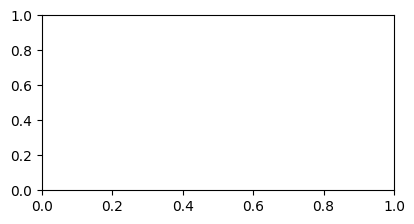

In [26]:
# Have 2 figures next to each other of 3dshapes and symbolic dataset
plt.figure(figsize=(10,5))

# Plot 3dshapes Specific
plt.subplot(2, 2, 1)
sns.boxplot(x='level', y='symbol frequency', data=symbol_redundancy_dict_specific_3ds, color='gray')
plt.xticks(ticks=[0,1,2,3], labels=[1,2,3,4], fontsize=15)
plt.yticks(ticks=[0, 1, 2], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.ylabel('occurrences', fontsize=16)
plt.title('symbol redundancy 3dshapes \'specific\'', fontsize=17, y=1.05)

# Plot 3dshapes Generic
plt.subplot(2, 2, 2)
sns.boxplot(x='level', y='symbol frequency', data=symbol_redundancy_dict_generic_3ds, color='gray')
plt.xticks(ticks=[0,1,2,3], labels=[1,2,3,4], fontsize=15)
plt.yticks(ticks=[0, 1, 2], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.ylabel('occurrences', fontsize=16)
plt.title('symbol redundancy 3dshapes \'generic\'', fontsize=17, y=1.05)

# Plot symbolic dataset Specific
plt.subplot(2, 2, 3)
sns.boxplot(x='level', y='symbol frequency', data=symbol_redundancy_dict_specific_st, color='gray')
plt.xticks(ticks=[0,1,2,3], labels=[1,2,3,4], fontsize=15)
plt.yticks(ticks=[0, 1, 2], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.ylabel('occurrences', fontsize=16)
plt.title('symbol redundancy symbolic dataset \'specific\'', fontsize=17, y=1.05)

# Plot symbolic dataset Generic 
plt.subplot(2, 2, 4)
sns.boxplot(x='level', y='symbol frequency', data=symbol_redundancy_dict_generic_st, color='gray')
plt.xticks(ticks=[0,1,2,3], labels=[1,2,3,4], fontsize=15)
plt.yticks(ticks=[0, 1, 2], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.ylabel('occurrences', fontsize=16)
plt.title('symbol redundancy symbolic dataset \'generic\'', fontsize=17, y=1.05)

plt.show()

## Test Dataset

In [27]:
symbol_redundancy_test_dict_specific_3ds = symbol_redundancy_zs(path_3ds_zs, n_runs=n_runs, cond='specific', datasets=datasets, setting=setting, train_or_test="test")
symbol_redundancy_test_dict_generic_3ds = symbol_redundancy_zs(path_3ds_zs, n_runs=n_runs, cond='specific', datasets=datasets, setting=setting, train_or_test="test")

symbol_redundancy_test_dict_specific_st = symbol_redundancy_zs(path_zs, n_runs=n_runs, cond='specific', datasets=datasets, setting=setting, train_or_test="test")
symbol_redundancy_test_dict_generic_st = symbol_redundancy_zs(path_zs, n_runs=n_runs, cond='generic', datasets=datasets, setting=setting, train_or_test="test")

FileNotFoundError: [Errno 2] No such file or directory: 'results/3dshapes/shapes3d_feat_rep_game_size_10_vsf_3/standard/specific/0/symbol_redundancy_test.pkl'

NameError: name 'symbol_redundancy_test_dict_specific_3ds' is not defined

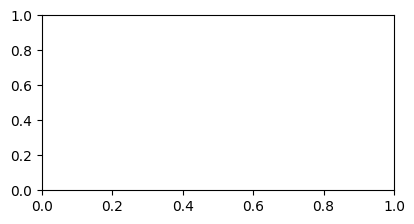

In [28]:
# Have 2 figures next to each other of 3dshapes and symbolic dataset
plt.figure(figsize=(10,5))

# Plot 3dshapes Specific
plt.subplot(2, 2, 1)
sns.boxplot(x='level', y='symbol frequency', data=symbol_redundancy_test_dict_specific_3ds, color='gray')
plt.xticks(ticks=[0,1,2,3], labels=[1,2,3,4], fontsize=15)
plt.yticks(ticks=[0, 1, 2], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.ylabel('occurrences', fontsize=16)
plt.title('symbol redundancy 3dshapes \'specific\'', fontsize=17, y=1.05)

# Plot 3dshapes Generic
plt.subplot(2, 2, 2)
sns.boxplot(x='level', y='symbol frequency', data=symbol_redundancy_test_dict_generic_3ds, color='gray')
plt.xticks(ticks=[0,1,2,3], labels=[1,2,3,4], fontsize=15)
plt.yticks(ticks=[0, 1, 2], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.ylabel('occurrences', fontsize=16)
plt.title('symbol redundancy 3dshapes \'generic\'', fontsize=17, y=1.05)

# Plot symbolic dataset Specific
plt.subplot(2, 2, 3)
sns.boxplot(x='level', y='symbol frequency', data=symbol_redundancy_test_dict_specific_st, color='gray')
plt.xticks(ticks=[0,1,2,3], labels=[1,2,3,4], fontsize=15)
plt.yticks(ticks=[0, 1, 2], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.ylabel('occurrences', fontsize=16)
plt.title('symbol redundancy symbolic dataset \'specific\'', fontsize=17, y=1.05)

# Plot symbolic dataset Generic 
plt.subplot(2, 2, 4)
sns.boxplot(x='level', y='symbol frequency', data=symbol_redundancy_test_dict_generic_st, color='gray')
plt.xticks(ticks=[0,1,2,3], labels=[1,2,3,4], fontsize=15)
plt.yticks(ticks=[0, 1, 2], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.ylabel('occurrences', fontsize=16)
plt.title('symbol redundancy symbolic dataset \'generic\'', fontsize=17, y=1.05)

plt.show()

### Interpretation 